In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.shape)
customer_df.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
customer_df.isnull().sum()/len(customer_df)

Customer                         0.0
State                            0.0
Customer Lifetime Value          0.0
Response                         0.0
Coverage                         0.0
Education                        0.0
Effective To Date                0.0
EmploymentStatus                 0.0
Gender                           0.0
Income                           0.0
Location Code                    0.0
Marital Status                   0.0
Monthly Premium Auto             0.0
Months Since Last Claim          0.0
Months Since Policy Inception    0.0
Number of Open Complaints        0.0
Number of Policies               0.0
Policy Type                      0.0
Policy                           0.0
Renew Offer Type                 0.0
Sales Channel                    0.0
Total Claim Amount               0.0
Vehicle Class                    0.0
Vehicle Size                     0.0
dtype: float64

In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [6]:
#Rename the columns so they follow the PE8 (snake case).
##customer_df.columns

In [7]:
#lowercase
customer_df.columns = customer_df.columns.str.lower()  

In [8]:
#underscore
customer_df.columns = customer_df.columns.str.replace(' ','_')

In [9]:
#after
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [10]:
#Change effective to date column to datetime format.

customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'], errors ='coerce')
#customer_df


# plz ignore
# customer_df.style.format({"effective_to_date": lambda t: t.strftime("%d/%m/%Y")})
# print (customer_df)

#my_date = datetime.strptime(my_string, "%Y-%m-%d")


# def change_date_format(dt):
#         return re.sub(r'(\d{4})-(\d{1,2})-(\d{1,2})', '\\3-\\2-\\1', dt)


In [11]:
#customer_df.dtypes

In [12]:
#numericals
numericals = customer_df.select_dtypes(np.number)
numericals.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [13]:
numericals.shape

(9134, 8)

In [14]:
#Check NaN values per column.
#did this at the beginning, got zero nan for everything
#customer_df.isnull().sum()/len(customer_df)

In [15]:
categoricals = customer_df.select_dtypes(object)
categoricals.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [16]:
categoricals.shape

(9134, 15)

In [17]:

categoricals = categoricals.drop('customer',axis=1)    
print(categoricals.shape)
categoricals.head()

(9134, 14)


,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [18]:
categoricals.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [19]:
#set DataFrame #https://www.w3schools.com/python/pandas/pandas_dataframes.asp
time = pd.DataFrame()

In [20]:
time['month'] = customer_df['effective_to_date'].dt.month

In [21]:
time['week'] = customer_df['effective_to_date'].dt.week

<ipython-input-21-8949dfa62b8d>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  time['week'] = customer_df['effective_to_date'].dt.week


In [22]:
time['day'] = customer_df['effective_to_date'].dt.day

In [23]:
time['year'] = customer_df['effective_to_date'].dt.year

In [24]:
#target
time['target_var'] = customer_df['total_claim_amount']

In [25]:
#sns.lineplot(x = time.year, y = time.target_var);

In [26]:
#sns.lineplot(x = time.day, y = time.target_var);

In [27]:
#sns.lineplot(x = time.month, y = time.target_var);

In [28]:
#sns.lineplot(x=time.week, y=time.target_var);

In [29]:
#time.week.value_counts()

In [30]:
#sns.lineplot(x = time.day, y = time.target_var, hue = time.month, palette='Set2');

In [31]:
#transform date column

customer_df['month'] = customer_df['effective_to_date'].dt.month
customer_df['day'] = customer_df['effective_to_date'].dt.day
customer_df = customer_df.drop(['effective_to_date'], axis = 1)

In [32]:
#Define a function that differentiates between continuous and discrete variables. 
#Hint: A number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.
#https://keydifferences.com/difference-between-discrete-and-continuous-variable.html

# def is_discrete(customer_df):
#     for col in customer_df.columns:
#         if len(customer_df[col].unique())<=10:
#             print(col,len(customer_df[col].unique()))
#     return(customer_df)

# is_discrete(customer_df)

def define_variable(df, unique_value_max=10):           #Andy created this code
    categoricals = []
    num_continuous = []
    num_descrete = []
    for c in df.columns:
        if df[c].dtype == object:
            #print(c + " categorical")
            categoricals.append(c)
        else:
            if df[c].nunique() > unique_value_max:
                #print(c + " numerical - continuous")
                num_continuous.append(c)
            else:
                #print(c + " numerical - descrete")
                num_descrete.append(c)
        # maybe print the return order for added clarity on how to use function
        # is this going to throw a fit if we dont append anything to one of the vars...checked by passing back one of the split out dfs
    return df[categoricals], df[num_continuous], df[num_descrete]
cat_features, num_continuous_features, num_descrete_features = define_variable(customer_df)
cat_features2, num_continuous_features2, num_descrete_features2 = define_variable(cat_features) # check if this breaks function...
cat_features = cat_features.drop('customer',axis=1)   
display(cat_features.head())
#num_continuous_features = num_continuous_features.drop('effective_to_date',axis=1)    
# print(num_continuous_features.shape)

# display(num_continuous_features)
# display(num_descrete_features)



# def find_my_cat(numericals):
#      for col in customer_df.columns:
#          discrete_var = [key for key in dict(numericals.dtypes)
#              if dict(numericals.dtypes)[key] in ['int32','int64']]  
#          continuous_var = [key for key in dict(numericals.dtypes)
#              if dict(numericals.dtypes)[key] in ['float64','float32'] ]   
#      return(discrete_var,continuous_var)
    
# display(find_my_cat(numericals))

# def is_unique(numericals):
#     for col in numericals.columns:
#         if len(numericals[col].unique())<=10:
#             print(col,(numericals[col].unique()))
#     return(numericals)

# display(is_unique(numericals))


#this code works
# continuous_var = customer_df._get_numeric_data().columns
# display(continuous_var)
# discrete_var = list(set(customer_df.columns) - set(continuous_var))
# categorical_var


# continuous_var = [key for key in dict(customer_df.dtypes)
#                    if dict(customer_df.dtypes)[key]
#                        in ['float64','float32','int32','int64']] # Numeric Variable

# discrete_var = [key for key in dict(customer_df.dtypes)
#              if dict(customer_df.dtypes)[key] in ['object'] ] # Categorical Varible

# display(continuous_var)
# discrete_var

#interesting  this might be the correct way
# def is_discrete(customer_df):
#     for col in customer_df.columns:
#         if len(customer_df[col].unique())<=10:
#             print(col,len(customer_df[col].unique()))
#     return(customer_df)

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [33]:
cat_features.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [34]:
# #matrix
# corrMatrix = numericals.corr()
# sns.heatmap(corrMatrix, annot=True)
# plt.show()

In [35]:
# plt.figure(figsize=(15,8))
# sns.countplot('number_of_policies', hue='number_of_policies', data=num_descrete_features)
# plt.show()


In [36]:
#display(numericals['number_of_open_complaints'].value_counts(dropna=False))
#display(numericals['number_of_policies'].value_counts(dropna=False))

In [37]:
#For the categorical data, check if there is some kind of text in a variable so we would need to clean it. 
#Hint: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.
#plz ignore
# categoricals = customer_df.select_dtypes(object)
cat_features.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [38]:
cat_features.shape

(9134, 14)

In [39]:
# #following the lab directions...
# def is_unique(categoricals):
#     for col in categoricals.columns:
#         if len(categoricals[col].unique())<=10:
#             print(col,(categoricals[col].unique()))
#     return(categoricals)

# is_unique(categoricals)

In [40]:
#dropped already, see above
# cat_features = cat_features.drop('customer',axis=1)    
# print(cat_features.shape)
# cat_features.head()

In [41]:
# f, axes = plt.subplots(int(cat_features.shape[1]/2),2, figsize =(30,50))
# for i, col in enumerate(cat_features):
#     sns.barplot(x = cat_features[col].value_counts().index,
#                 y = cat_features[col].value_counts(),
#                 ax = axes[int(i/2)][int(i)%2])
#     axes[int(i/2)][int(i)%2].set_title(col,fontsize = 10)
#     axes[int(i/2)][int(i)%2].set_ylabel('')
    

In [42]:
def clean_employmentstatus(x):
    if x in ['Medical Leave','Disabled', 'Retired']:
        return 'Other'
    else:
        return x

In [43]:
cat_features['employmentstatus'] = cat_features['employmentstatus'].apply(clean_employmentstatus)

In [44]:
#sns.barplot(x=cat_features['employmentstatus'].value_counts().index, y=cat_features['employmentstatus'].value_counts());

In [45]:
def clean_education(x):
    if x in ['Master','Doctor']:
        return 'Higher Education'
    else:
        return x

In [46]:
cat_features['education'] = cat_features['education'].apply(clean_education)

In [47]:
#sns.barplot(x=cat_features['education'].value_counts().index, y=cat_features['education'].value_counts());

In [48]:
#discrete
# for col in num_descrete_features.columns :    
#     plt.figure(figsize=(10,5))
#     sns.countplot(x = col, data=num_descrete_features)
#     plt.show()


In [49]:
# #continuous
# for col in  num_continuous_features.columns :
#     sns.boxplot(data = num_continuous_features[col])
#     plt.show() 
#     print(col)

16414.039911750002


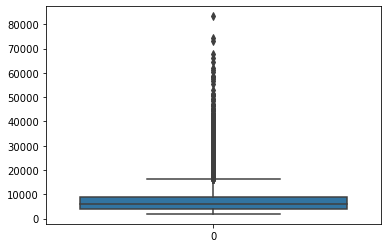

customer_lifetime_value


In [50]:
#We will start with removing outliers. So far, we have discussed different methods to remove outliers. 
#Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.
# customer_lifetime_value
iqr = np.percentile(num_continuous_features['customer_lifetime_value'],75) - np.percentile(num_continuous_features['customer_lifetime_value'],25)   #calculate IQR
upper_limit = np.percentile(num_continuous_features['customer_lifetime_value'],75) + 1.5*iqr      #upper limit is 16414
print(upper_limit)

customer_df = customer_df[customer_df['customer_lifetime_value'] < upper_limit]        

sns.boxplot(data = num_continuous_features['customer_lifetime_value'])
plt.show() 
print('customer_lifetime_value')

170.5


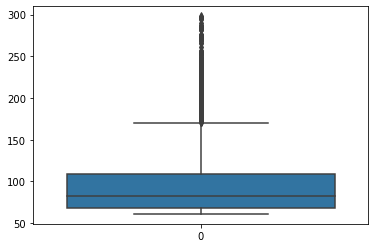

monthly_premium_auto


In [51]:
# monthly_premium_auto
iqr = np.percentile(num_continuous_features['monthly_premium_auto'],75) - np.percentile(num_continuous_features['monthly_premium_auto'],25)   #calculate IQR
upper_limit = np.percentile(num_continuous_features['monthly_premium_auto'],75) + 1.5*iqr      #upper limit is 165
print(upper_limit)

customer_df = customer_df[customer_df['monthly_premium_auto'] < upper_limit] 

sns.boxplot(data = num_continuous_features['monthly_premium_auto'])
plt.show() 
print('monthly_premium_auto')

960.3997301249999


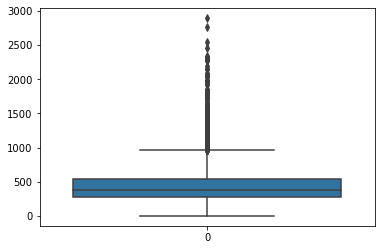

total_claim_amount


In [52]:
# total_claim_amount
iqr = np.percentile(num_continuous_features['total_claim_amount'],75) - np.percentile(num_continuous_features['total_claim_amount'],25)   #calculate IQR
upper_limit = np.percentile(num_continuous_features['total_claim_amount'],75) + 1.5*iqr      #upper limit is 923
print(upper_limit)

customer_df = customer_df[customer_df['total_claim_amount'] < upper_limit] 

sns.boxplot(data = num_continuous_features['total_claim_amount'])
plt.show() 
print('total_claim_amount')

In [53]:
#num_continuous_features['customer_lifetime_value'].hist()

In [54]:
#num_continuous_features['monthly_premium_auto'].hist()

In [55]:
#num_continuous_features['total_claim_amount'].hist()

In [56]:
#Create a copy of the dataframe for the data wrangling.


In [57]:
#Normalize the continuous variables. You can use any one method you want.

#REUSABLE
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(num_continuous_features)
continuous_feat=pd.DataFrame(scaler.transform(num_continuous_features),
            columns=num_continuous_features.columns, index=num_continuous_features.index) 
continuous_feat

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount,day
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.132974,0.766667
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.391051,1.000000
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.195764,0.600000
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.183117,0.633333
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.047710,0.066667
...,...,...,...,...,...,...,...
9129,0.264137,0.719547,0.050633,0.514286,0.898990,0.068485,0.300000
9130,0.014719,0.216081,0.075949,0.400000,0.282828,0.131034,0.366667
9131,0.076951,0.000000,0.101266,0.257143,0.373737,0.273297,0.166667
9132,0.069098,0.219452,0.147679,0.971429,0.030303,0.238876,0.066667


In [58]:
continuous_feat = continuous_feat.reset_index()

In [59]:
cat_features.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [60]:
cat_features.nunique()

state               5
response            2
coverage            3
education           4
employmentstatus    3
gender              2
location_code       3
marital_status      3
policy_type         3
policy              9
renew_offer_type    4
sales_channel       4
vehicle_class       6
vehicle_size        3
dtype: int64

In [61]:
#Encode the categorical variables (the columns which have > 4 unique var)

oneEncode_cols = ['state','education','employmentstatus','policy',
                  'renew_offer_type','sales_channel','vehicle_class']
oneEncode_df = cat_features[oneEncode_cols]
oneEncode_df.shape

(9134, 7)

In [62]:
encoded_df = pd.get_dummies(oneEncode_df, columns = oneEncode_cols,drop_first = True)                           
encoded_df.shape

(9134, 28)

In [63]:
encoded_df = encoded_df.reset_index()

In [64]:
num_descrete_features = num_descrete_features.reset_index()

In [65]:
num_descrete_features

,index,number_of_open_complaints,number_of_policies,month
0,0,0,1,2
1,1,0,8,1
2,2,0,2,2
3,3,0,7,1
4,4,0,1,2
...,...,...,...,...
9129,9129,0,2,2
9130,9130,0,1,2
9131,9131,3,2,2
9132,9132,0,3,2


In [66]:
#ignore
# date_df = customer_df[['customer','effective_to_date']]
# date_df.head()

In [67]:
continuous_feat

,index,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount,day
0,0,0.010629,0.562847,0.033755,0.914286,0.050505,0.132974,0.766667
1,1,0.062406,0.000000,0.139241,0.371429,0.424242,0.391051,1.000000
2,2,0.134960,0.487763,0.198312,0.514286,0.383838,0.195764,0.600000
3,3,0.070589,0.000000,0.189873,0.514286,0.656566,0.183117,0.633333
4,4,0.011245,0.438443,0.050633,0.342857,0.444444,0.047710,0.066667
...,...,...,...,...,...,...,...,...
9129,9129,0.264137,0.719547,0.050633,0.514286,0.898990,0.068485,0.300000
9130,9130,0.014719,0.216081,0.075949,0.400000,0.282828,0.131034,0.366667
9131,9131,0.076951,0.000000,0.101266,0.257143,0.373737,0.273297,0.166667
9132,9132,0.069098,0.219452,0.147679,0.971429,0.030303,0.238876,0.066667


In [68]:
#concatenate
overall_df = pd.concat([continuous_feat,num_descrete_features,encoded_df], axis = 1)
display(overall_df.shape)
overall_df

(9134, 41)

,index,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount,day,index,number_of_open_complaints,...,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,0,0.010629,0.562847,0.033755,0.914286,0.050505,0.132974,0.766667,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0.062406,0.000000,0.139241,0.371429,0.424242,0.391051,1.000000,1,0,...,1,0,0,0,0,0,0,0,0,0
2,2,0.134960,0.487763,0.198312,0.514286,0.383838,0.195764,0.600000,2,0,...,0,0,0,0,0,0,0,0,0,1
3,3,0.070589,0.000000,0.189873,0.514286,0.656566,0.183117,0.633333,3,0,...,0,0,0,1,0,0,0,1,0,0
4,4,0.011245,0.438443,0.050633,0.342857,0.444444,0.047710,0.066667,4,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,9129,0.264137,0.719547,0.050633,0.514286,0.898990,0.068485,0.300000,9129,0,...,0,0,0,0,1,0,0,0,0,0
9130,9130,0.014719,0.216081,0.075949,0.400000,0.282828,0.131034,0.366667,9130,0,...,0,0,1,0,0,0,0,0,0,0
9131,9131,0.076951,0.000000,0.101266,0.257143,0.373737,0.273297,0.166667,9131,3,...,0,0,1,0,0,0,0,0,0,0
9132,9132,0.069098,0.219452,0.147679,0.971429,0.030303,0.238876,0.066667,9132,0,...,1,0,1,0,0,0,0,0,0,0


In [69]:
overall_df = overall_df.drop(['index'],axis =1)
overall_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount,day,number_of_open_complaints,number_of_policies,month,...,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.132974,0.766667,0,1,2,...,0,0,0,0,0,0,0,0,0,1
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.391051,1.000000,0,8,1,...,1,0,0,0,0,0,0,0,0,0
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.195764,0.600000,0,2,2,...,0,0,0,0,0,0,0,0,0,1
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.183117,0.633333,0,7,1,...,0,0,0,1,0,0,0,1,0,0
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.047710,0.066667,0,1,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.264137,0.719547,0.050633,0.514286,0.898990,0.068485,0.300000,0,2,2,...,0,0,0,0,1,0,0,0,0,0
9130,0.014719,0.216081,0.075949,0.400000,0.282828,0.131034,0.366667,0,1,2,...,0,0,1,0,0,0,0,0,0,0
9131,0.076951,0.000000,0.101266,0.257143,0.373737,0.273297,0.166667,3,2,2,...,0,0,1,0,0,0,0,0,0,0
9132,0.069098,0.219452,0.147679,0.971429,0.030303,0.238876,0.066667,0,3,2,...,1,0,1,0,0,0,0,0,0,0


In [70]:
# Additional question to today’s lab:
# Find out if there is a relationship between the following categorical columns using Chi-Squared: 
# education - vehicle_size
# location_code - coverage
# Comment on what the presence (or not) of this relationship means for your dataset and if there are any steps you should take.

In [71]:
import scipy.stats as st

In [72]:
cat_features.columns

Index(['state', 'response', 'coverage', 'education', 'employmentstatus',
       'gender', 'location_code', 'marital_status', 'policy_type', 'policy',
       'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [73]:
data_1 = pd.crosstab(cat_features['education'], cat_features['vehicle_size'], margins = False)
print('p val education - vehicle_size', round(st.chi2_contingency(data_1)[1],3))
#p is high, H0 MUST STAY!

p val education - vehicle_size 0.171


In [74]:
data_2 = pd.crosstab(cat_features['location_code'], cat_features['coverage'], margins = False)
print('p val location_code - coverage', round(st.chi2_contingency(data_2)[1],3))
#p is low, H0 MUST GO!

p val location_code - coverage 0.0


In [75]:
#lab comparing regression values

In [77]:
X = overall_df.drop(['total_claim_amount'],axis = 1)
y = overall_df['total_claim_amount']

In [78]:
#train_test_split and separate 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1337)

In [80]:
# linear regression with all the data 

from sklearn import linear_model

lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

from sklearn.metrics import r2_score

predictions_test = lm.predict(X_test)
r2 = r2_score(y_test, predictions_test)
print('R2:',round(r2,2))


from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test,predictions_test)
print('MSE:',round(MSE,1))

import numpy as np

RMSE = np.sqrt(mean_squared_error(y_test,predictions_test))
print('RMSE:',round(RMSE,1))

# def rmspe(y_true, y_pred):
#     return np.sqrt(np.nanmean(np.square(((y_true - y_pred) / y_true))))*100

# print('RMSPE:',round(rmspe(y_test, predictions_test),1))

from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_test, predictions_test)
print('MAE:',round(MAE,1))

R2: 0.56
MSE: 0.0
RMSE: 0.1
MAE: 0.1


In [91]:
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor(n_neighbors=7)
KNN.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=7)

In [92]:
score = KNN.score(X_test, y_test)
score

0.21206393080192532

In [84]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(random_state=42, activation="identity")
mlp.fit(X_train, y_train)

MLPRegressor(activation='identity', random_state=42)

In [94]:
score_mlp = mlp.score(X_test,y_test)
score_mlp

0.5474884047390645